          PL Intensity (kcps)
Time (s)                     
9.456                    6.50
9.460                    4.75
9.464                    7.50
9.468                   11.00
9.472                   10.75


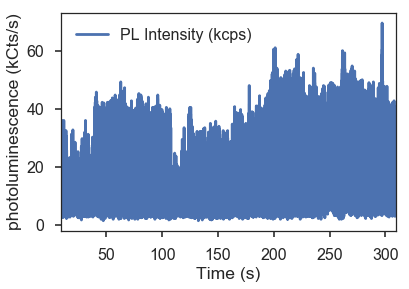

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 27 17:17:43 2018

Blinker analysis

@author: Viva Horowitz
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
sns.set(style='ticks')
sns.set_context('poster')

datadate = '2018-05-31'
datafolder = r'O:\User\Viva\data\2018-05-31_blinking-statistics'
filename = r'04-21-2018.11,00am.FIBedhBN\03-45degreepolarization.txt'
analysisfolder = r'O:\User\Viva\analysis\blinker_analysis'

fitpastemptybin = True

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kcps)'

data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kcps)'],
                   usecols=[0,1])

data = data.set_index(tname)
print(data.head())

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
plt.show()

filename = filename.replace('\\','-')
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

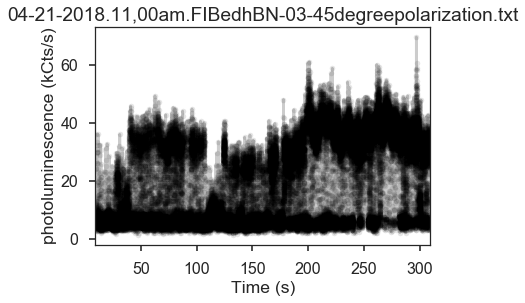

In [2]:
fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+',blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinking.png', bbox_inches='tight', dpi=200)

plt.show()

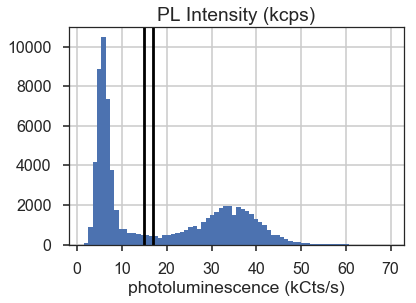

In [3]:
data.hist(bins=70)
plt.xlabel('photoluminescence (kCts/s)')
plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

# Need to pick an appropriate threshold between on and off. 
uthreshold = 17
lthreshold = uthreshold-2

ax.axvline(x=uthreshold, color='k')
ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)
plt.show()

In [4]:
# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
timesetting

0.0040000000000013358

In [5]:
data.head()

,PL Intensity (kcps)
Time (s),
9.456,6.50
9.460,4.75
9.464,7.50
9.468,11.00
9.472,10.75


In [6]:
data.count()

PL Intensity (kcps)    74999
dtype: int64

In [7]:
data.describe()

,PL Intensity (kcps)
count,74999.000000
mean,18.393432
std,14.194067
min,1.500000
25%,5.750000
50%,9.500000
75%,32.500000
max,69.500000


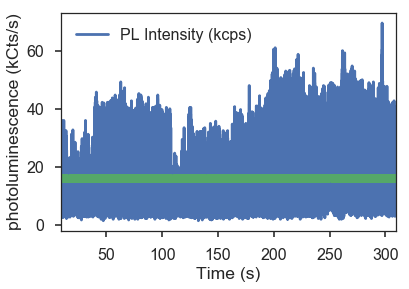

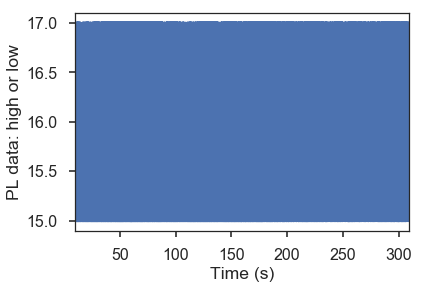

In [8]:
# With an uthreshold and an lthreshold
# This code has an in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either. 
# This seems like the most straightforward way to deal with (rare) cases in between.
# Other options are shown.


threshdata = data[PLname].clip(upper=uthreshold, lower=lthreshold)

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
threshdata.plot()

plt.figure()
threshdata.plot()
plt.ylabel('PL data: high or low')
plt.show()


In [9]:
# Main method: in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either.
downtimes2= threshdata[threshdata != uthreshold].index
uptimes2=threshdata[threshdata != lthreshold].index

print(uptimes2)
print(downtimes2)

Float64Index([  9.532,    9.68,   9.816,  10.024,  10.028,  10.344,  10.564,
               10.832,  10.836,   10.84,
              ...
              309.412, 309.416,  309.42, 309.424, 309.428, 309.432, 309.436,
               309.44, 309.444, 309.448],
             dtype='float64', name=u'Time (s)', length=33913)
Float64Index([  9.456,    9.46,   9.464,   9.468,   9.472,   9.476,    9.48,
                9.484,   9.488,   9.492,
              ...
              309.284, 309.288, 309.292, 309.296,   309.3, 309.304, 309.308,
              309.312, 309.316,  309.32],
             dtype='float64', name=u'Time (s)', length=41928)


In [10]:
# Alternate option (not used)
uptimes= threshdata[threshdata == uthreshold].index
downtimes=threshdata[threshdata == lthreshold].index

print(uptimes)
print(downtimes)

Float64Index([  9.532,    9.68,   9.816,  10.024,  10.028,  10.344,  10.564,
               10.832,  10.836,   10.84,
              ...
              309.412, 309.416,  309.42, 309.424, 309.428, 309.432, 309.436,
               309.44, 309.444, 309.448],
             dtype='float64', name=u'Time (s)', length=33071)
Float64Index([  9.456,    9.46,   9.464,   9.468,   9.472,   9.476,    9.48,
                9.484,   9.488,   9.492,
              ...
              309.284, 309.288, 309.292, 309.296,   309.3, 309.304, 309.308,
              309.312, 309.316,  309.32],
             dtype='float64', name=u'Time (s)', length=41086)


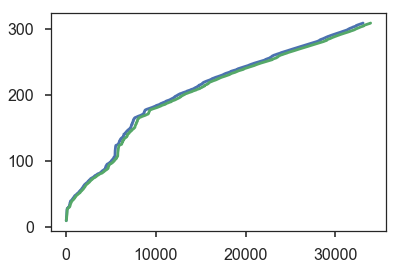

In [11]:
plt.plot(uptimes)
plt.plot(uptimes2)
plt.show()

In [12]:
uptimes[:-1]

Float64Index([  9.532,    9.68,   9.816,  10.024,  10.028,  10.344,  10.564,
               10.832,  10.836,   10.84,
              ...
              309.408, 309.412, 309.416,  309.42, 309.424, 309.428, 309.432,
              309.436,  309.44, 309.444],
             dtype='float64', name=u'Time (s)', length=33070)

In [13]:
uptimes[1:]

Float64Index([   9.68,   9.816,  10.024,  10.028,  10.344,  10.564,  10.832,
               10.836,   10.84,  10.912,
              ...
              309.412, 309.416,  309.42, 309.424, 309.428, 309.432, 309.436,
               309.44, 309.444, 309.448],
             dtype='float64', name=u'Time (s)', length=33070)

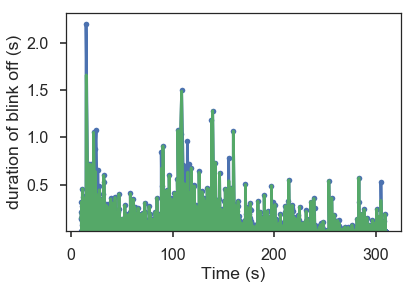

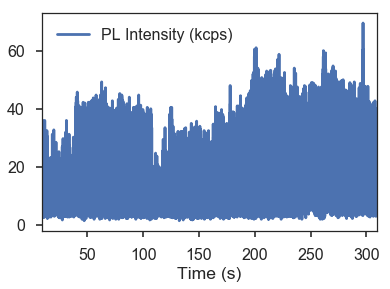

In [14]:
# We can compare the two ways of interpreting blinks.
# There is a discrepancy at about 22 seconds between the two interpretations. 
# It's a matter of whether we consider it stayed off or 
# if we consider that it came up enough to have ended the off blink and began another.
# I tend to think it ended one and began another in this case, so I'm going to use uptimesep2 as my off duration.

# subtracting each time from the last time we had the same state gives the amount of time it was not in that state.
# Therefore the separation between up times is in fact the duration of time off.
uptimesep = uptimes[1:] - uptimes[:-1]
uptimesep2 = uptimes2[1:] - uptimes2[:-1]
plt.plot(uptimes[:-1],uptimesep, '.-')
plt.plot(uptimes2[:-1],uptimesep2, '-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink off (s)')
plt.figure()
data.plot()
plt.show()

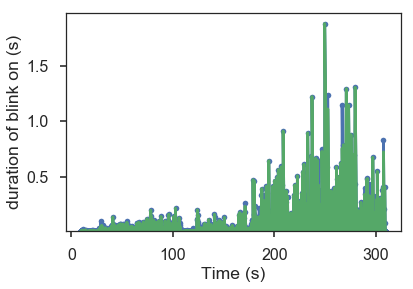

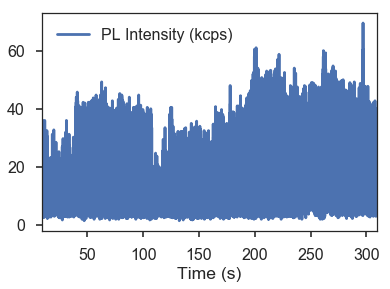

In [15]:
# We can compare the two ways of interpreting blinks. It looks like they mostly agree.

downtimesep = downtimes[1:] - downtimes[:-1]
downtimesep2 = downtimes2[1:] - downtimes2[:-1]
plt.plot(downtimes[:-1],downtimesep,'.-')
plt.plot(downtimes2[:-1],downtimesep2,'-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink on (s)')
#plt.figure()
data.plot()
plt.show()

In [16]:
downtimesep2

Float64Index([           0.004,            0.004,            0.004,
                         0.004,            0.004,            0.004,
                         0.004,            0.004,            0.004,
                         0.004,
              ...
              0.00400000000002, 0.00400000000002, 0.00399999999996,
              0.00400000000002, 0.00400000000002, 0.00399999999996,
              0.00400000000002, 0.00400000000002, 0.00399999999996,
              0.00400000000002],
             dtype='float64', name=u'Time (s)', length=41927)

In [17]:
# I chose to use downtimesep2 and uptimesep2, as detailed above.

ontimes = filter(lambda a: a > 1.5*timesetting, downtimesep2)
offtimes = filter(lambda a: a > 1.5*timesetting, uptimesep2)

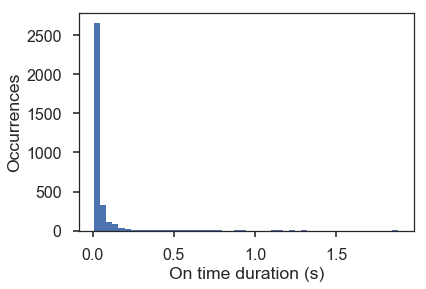

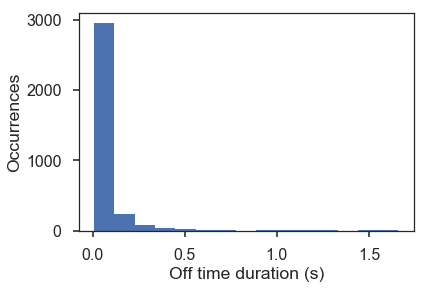

In [18]:
# Choose a nice number of bins to see how the data look.

numonbins = 50
numoffbins = 15

plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
plt.show()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
plt.show()

In [19]:
## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547

def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

In [20]:
# http://code.activestate.com/recipes/66472-frange-a-range-function-with-float-increments/
# could also use linspace

def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [21]:
## I decided to start my bins at 0. 
# This might be different from the built in hist function.

oninc = max(ontimes)/numonbins
onbins= frange(0,max(ontimes)+oninc*3,oninc)
#print(onbins[0:5])


offinc = max(offtimes)/numoffbins
offbins=np.linspace(0,max(offtimes),numoffbins+1)
print("linspace option (not used):")
print(offbins)
offbins= frange(0,max(offtimes),offinc)
print("frange approach:")
print(offbins)
#print(offbins[0:5])
offbins= frange(0,max(offtimes)+offinc*3,offinc)
print("frange approach and pad 3 bins to right (used):")
print(offbins)

centeredonbins = frange(oninc/2,max(ontimes)+oninc*3+oninc/2,oninc)
centeredoffbins= frange(offinc/2,max(offtimes)+offinc*3+offinc/2,offinc)
#centeredoffbins=np.linspace(offinc/2,max(offtimes)+offinc/2,numoffbins)


print('\n')
print(onbins[-5:])
print(centeredonbins[-5:])

print("Make sure ")
print(len(centeredonbins))
print(len(onbins))
print(len(centeredoffbins))
print(len(offbins))

linspace option (not used):
[ 0.          0.11066667  0.22133333  0.332       0.44266667  0.55333333
  0.664       0.77466667  0.88533333  0.996       1.10666667  1.21733333
  1.328       1.43866667  1.54933333  1.66      ]
frange approach:
[0.0, 0.11066666666666668, 0.22133333333333335, 0.33200000000000002, 0.44266666666666671, 0.55333333333333334, 0.66400000000000003, 0.77466666666666673, 0.88533333333333342, 0.99600000000000011, 1.1066666666666667, 1.2173333333333334, 1.3280000000000001, 1.4386666666666668, 1.5493333333333335]
frange approach and pad 3 bins to right (used):
[0.0, 0.11066666666666668, 0.22133333333333335, 0.33200000000000002, 0.44266666666666671, 0.55333333333333334, 0.66400000000000003, 0.77466666666666673, 0.88533333333333342, 0.99600000000000011, 1.1066666666666667, 1.2173333333333334, 1.3280000000000001, 1.4386666666666668, 1.5493333333333335, 1.6600000000000001, 1.7706666666666668, 1.8813333333333335]


[1.8086399999999867, 1.8463199999999864, 1.8839999999999861

In [22]:
onhist = histc(ontimes, np.asarray(onbins))
offhist = histc(offtimes, np.asarray(offbins))

In [23]:
onhist

[array([  2.49900000e+03,   4.26000000e+02,   1.46000000e+02,
          8.60000000e+01,   5.00000000e+01,   1.90000000e+01,
          1.20000000e+01,   7.00000000e+00,   1.00000000e+01,
          6.00000000e+00,   1.00000000e+01,   6.00000000e+00,
          8.00000000e+00,   6.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [24]:
offhist

[array([  2.92000000e+03,   2.64000000e+02,   7.80000000e+01,
          2.90000000e+01,   1.90000000e+01,   8.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([2, 2, 2, ..., 1, 2, 2], dtype=int64)]

red data are histogram data and black data are shifted to be centered on the bin


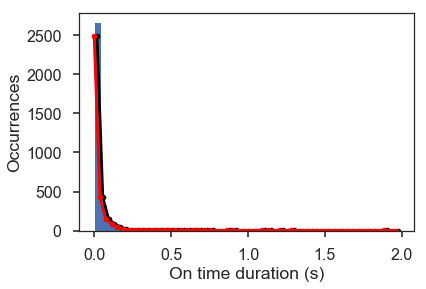

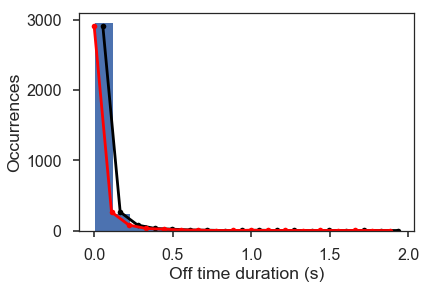

In [25]:
print("red data are histogram data and black data are shifted to be centered on the bin")

#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-k')
ax1.plot(onbins,onhist[0],'.-r')
plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')

# Apparently my digitize and the hist function don't quite give the same output. 
# I think the hist command doesn't start at zero.
# Either way is probably fine.

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-k')
ax2.plot(offbins,offhist[0],'.-r')
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax2.set_yscale('symlog')
plt.show()

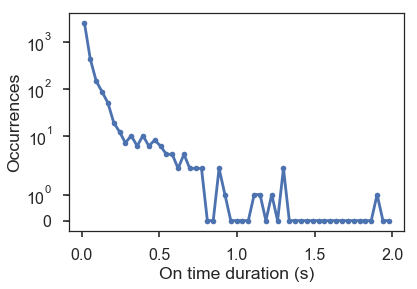

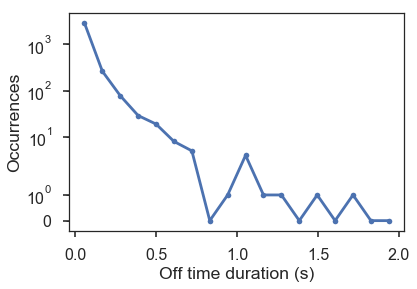

In [26]:
#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax2.set_yscale('symlog')
plt.show()

In [27]:
# cut off data above zero bin
onhistl = list(onhist[0])
centeredonbinstrunc = list(centeredonbins) # use the list command to make a copy
if not fitpastemptybin:
    zeroindexon = onhistl.index(0)
    del onhistl[zeroindexon:]
    del centeredonbinstrunc[zeroindexon:]
    
offhistl = list(offhist[0])
centeredoffbinstrunc = list(centeredoffbins) # use the list command to make a copy
if not fitpastemptybin:
    zeroindexoff = offhistl.index(0)
    del offhistl[zeroindexoff:]
    del centeredoffbinstrunc[zeroindexoff:]  

In [28]:
from scipy.optimize import curve_fit
import scipy
scipy.__version__
# need at least version 14.0 of scipy.

'0.17.1'

In [29]:
def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

# on time fit
onparams, onpcov = curve_fit(expfit, centeredonbinstrunc, onhistl,p0 = (30, 0.8))
onfitx = np.linspace(min(centeredonbins),len(onhistl)*oninc,numonbins*5)
onfit = expfit(onfitx,onparams[0],onparams[1])

In [30]:
# Trying to find good guess
#onparams[1]=-.8
#onfit = 30 * np.exp(centeredonbins/(onparams[1]))

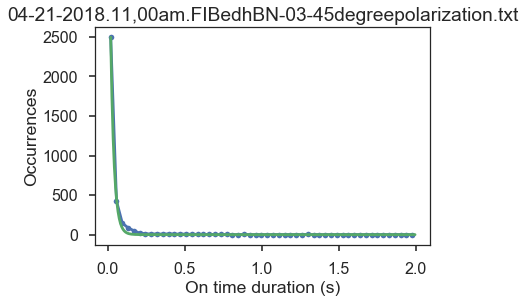

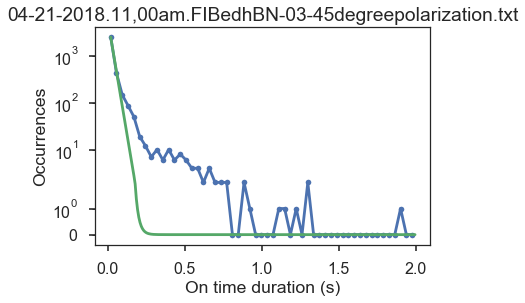

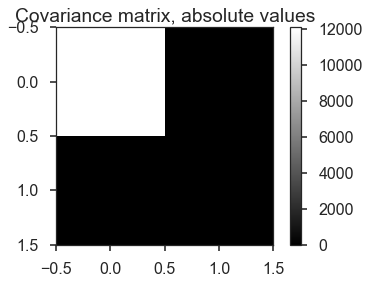

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 5831.47541019 ± 110.010288643
time constant tau = 0.0222003680045 ± 0.000434944205829 sec


In [31]:
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.title(filename)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.title(filename)
plt.show()

plt.imshow(abs(onpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(onparams[0]) + ' ± ' + str(np.sqrt(onpcov[0,0]))
print 'time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1])) + ' sec'



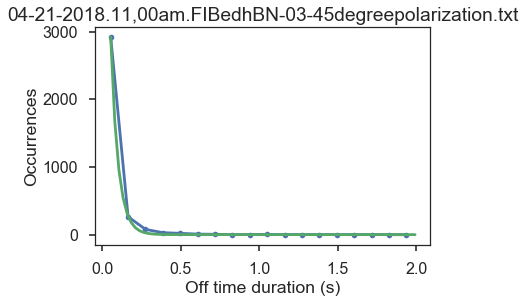

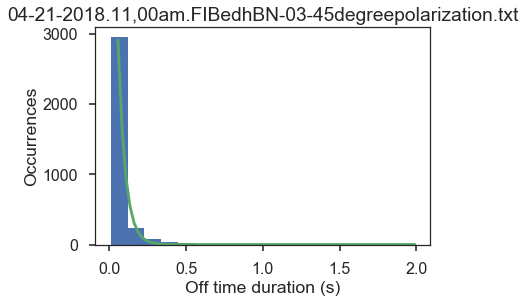

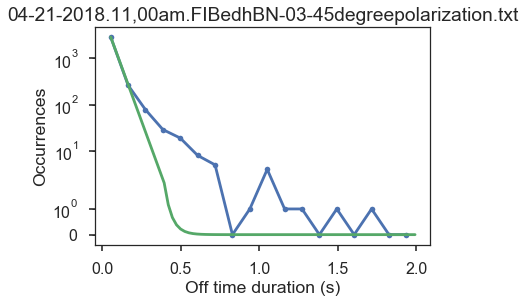

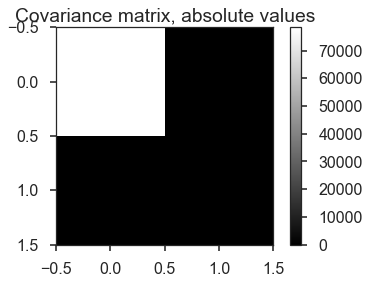

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 9519.6676029 ± 280.115207345
time constant tau = 0.0468152464674 ± 0.0011256390056 sec


In [32]:
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbinstrunc, offhistl,p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),len(offhistl)*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.title(filename)
plt.show()

fig,ax1 = plt.subplots()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.plot(offfitx,offfit)
plt.title(filename)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.title(filename)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

In [33]:
from matplotlib.offsetbox import AnchoredText

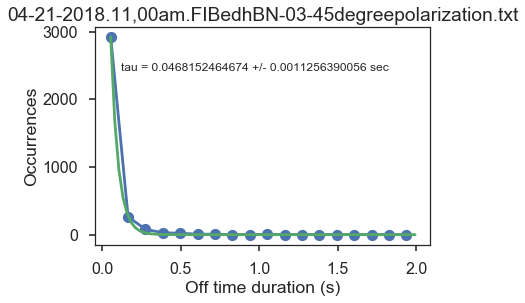

In [34]:
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'o-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.text(1.0,0.9,'tau = '  + str(offparams[1]) + ' +/- '  + str(np.sqrt(offpcov[1,1])) + ' sec',
         horizontalalignment='right', transform = ax1.transAxes, fontsize=12)
plt.title(filename)

plt.show()

off time constant tau = 0.0468152464674 ± 0.0011256390056 sec
on time constant tau = 0.0222003680045 ± 0.000434944205829 sec


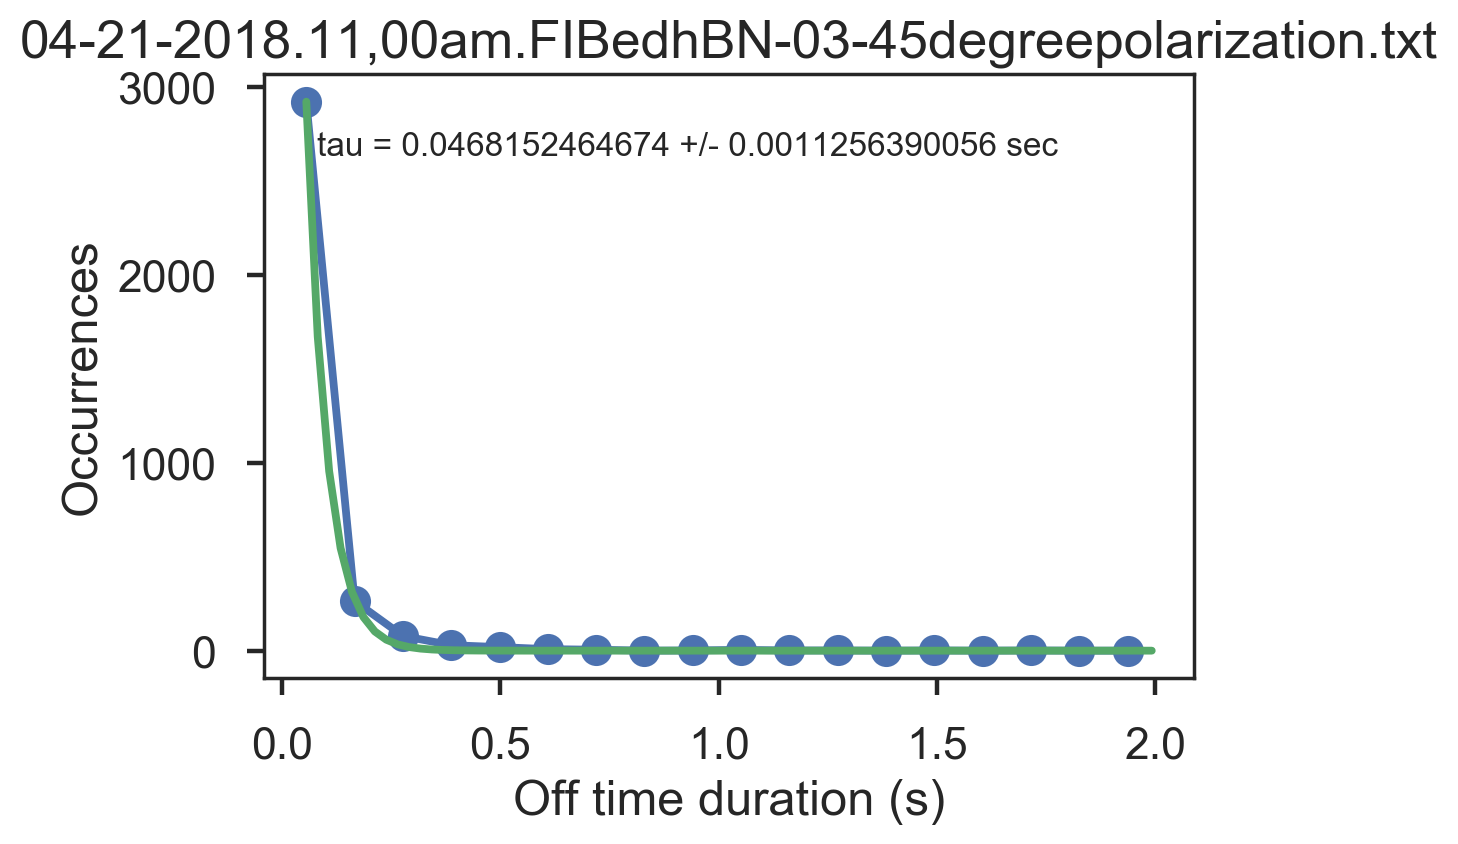

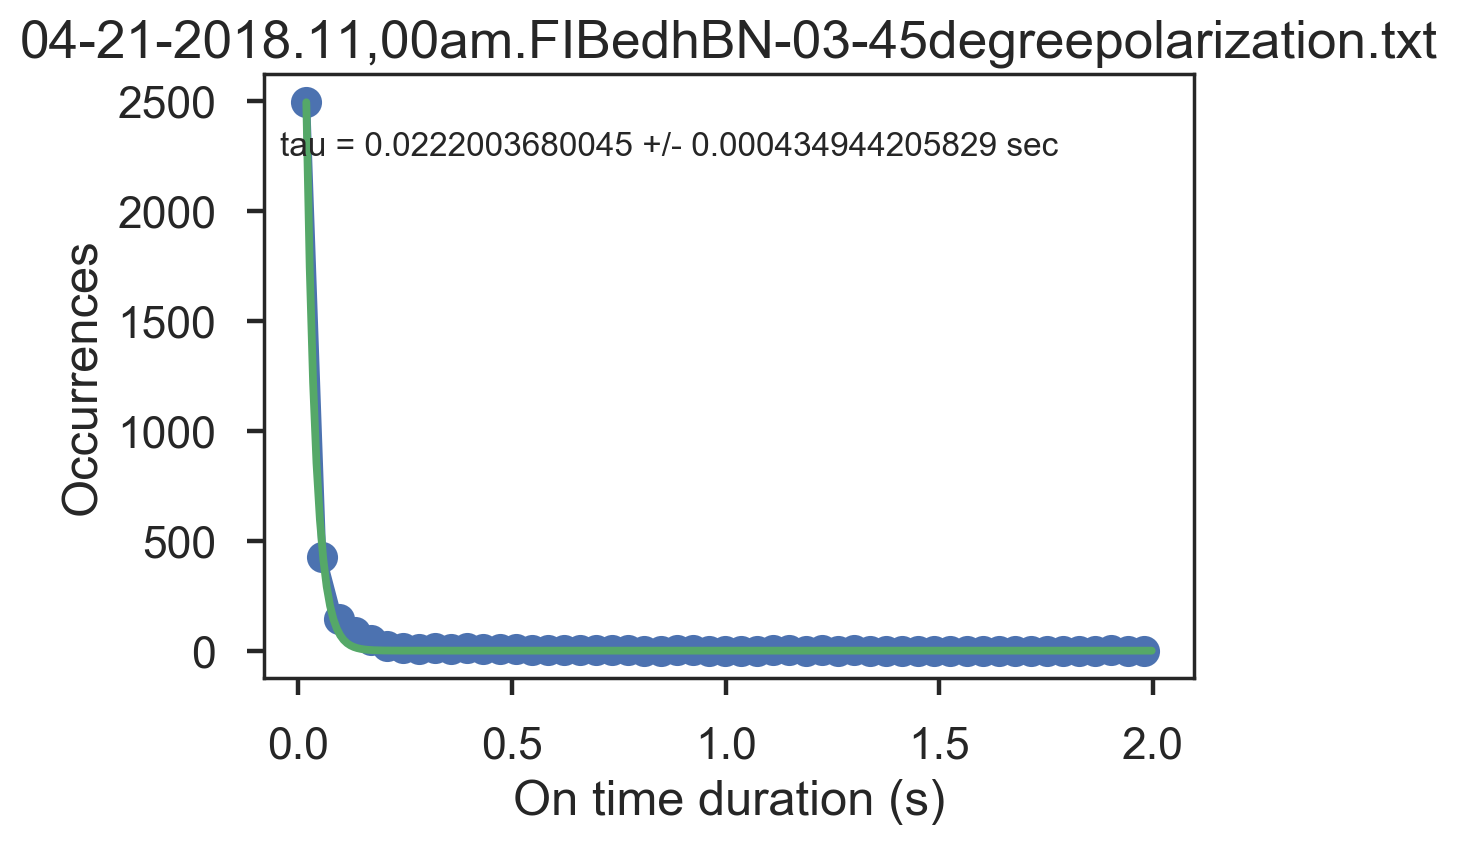

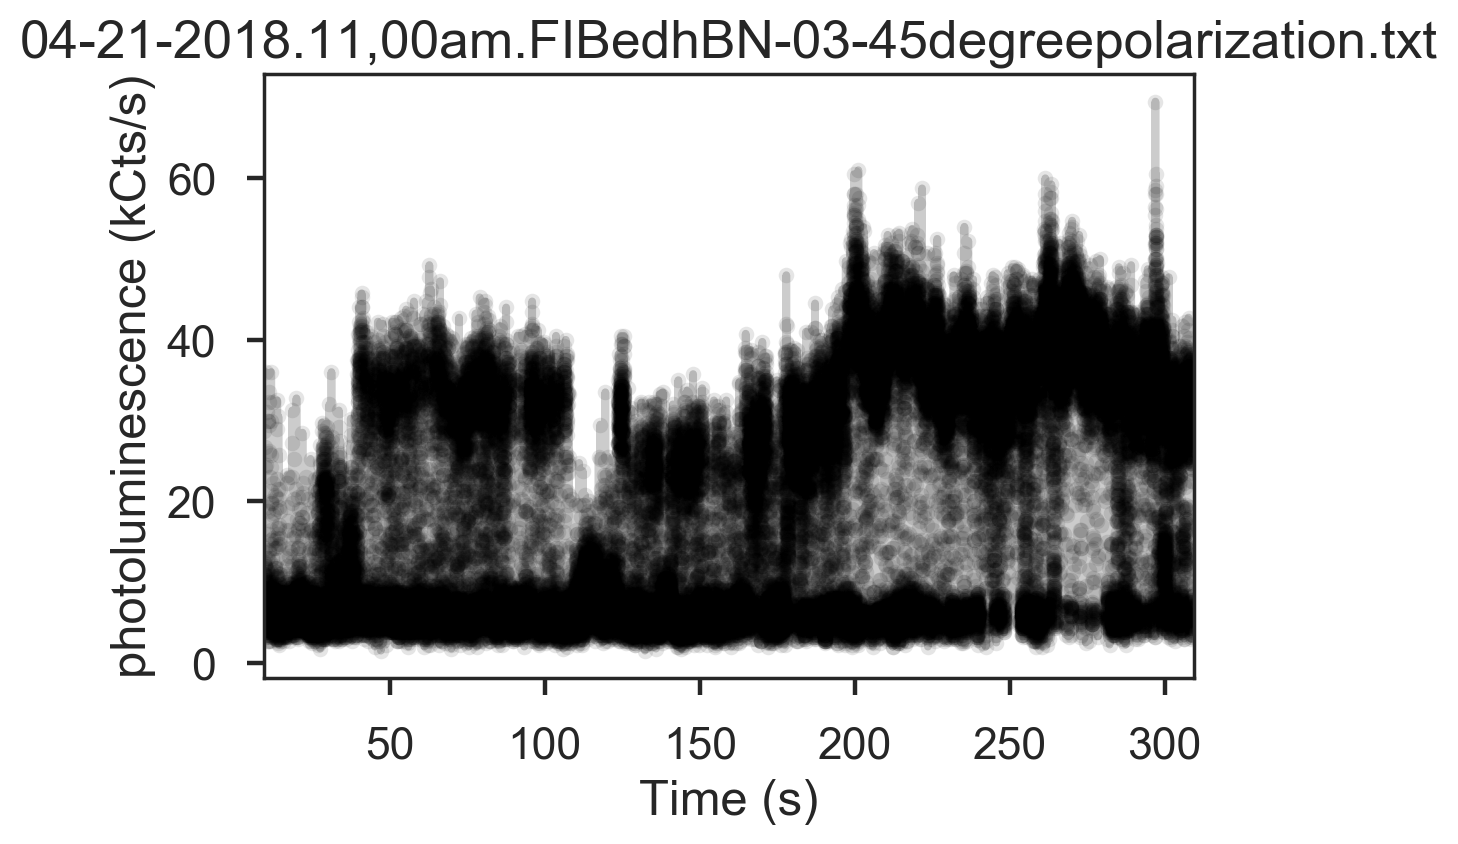

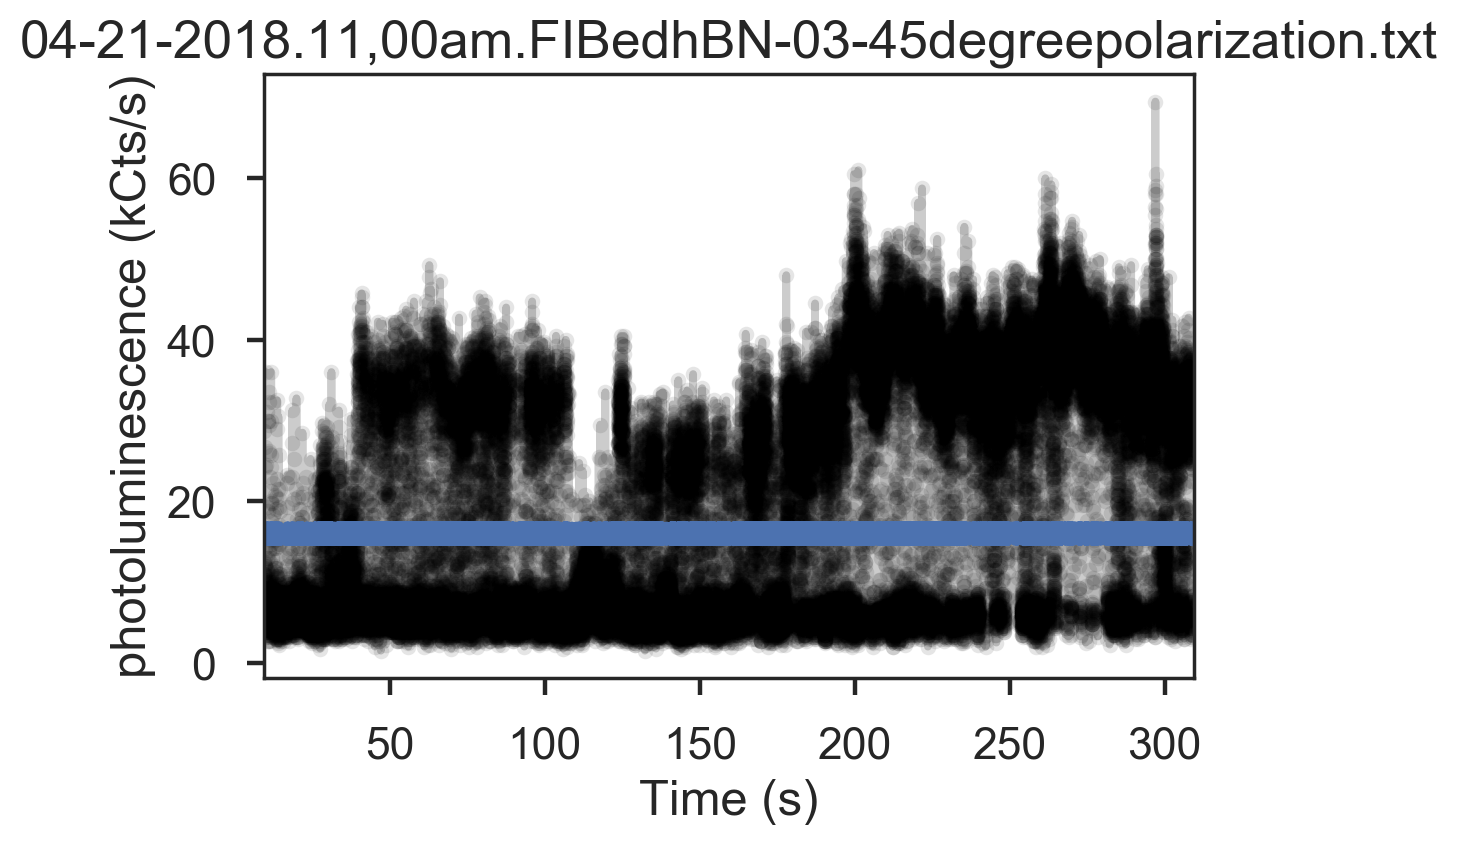

In [35]:
# Save figures

mpl.rcParams['figure.dpi'] = 200

font = {'size'   : 22}
plt.rc('font', **font)

if fitpastemptybin:
    infostr = ',fitpast0'
else:
    infostr = ''

# display off blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'o-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.text(3,3,'tau = '  + str(offparams[1]) + ' +/- '  + str(np.sqrt(offpcov[1,1])) + ' sec',
         horizontalalignment='right', transform = ax.transAxes, fontsize=12)
plt.title(filename)

plt.savefig(today + ',' + filename+',offblinks' + infostr + '.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',offblinks' + infostr + '.png', bbox_inches='tight')

print 'off time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'


# On blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'o-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.text(3,3,'tau = '  + str(onparams[1]) + ' +/- '  + str(np.sqrt(onpcov[1,1])) + ' sec',
         horizontalalignment='right', transform = ax.transAxes, fontsize=12)
plt.title(filename)

plt.savefig(today + ',' + filename+',onblinks' + infostr + '.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',onblinks' + infostr + '.png', bbox_inches='tight')


print 'on time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1])) + ' sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+',blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinking.png', bbox_inches='tight')


fig2,axPL = plt.subplots()
data.plot(marker='.',linestyle='None',legend=False, alpha=0.1, ax=axPL, color='k')
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
threshdata.plot(legend=False)
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+',blinkingandthreshold.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinkingandthreshold.png', bbox_inches='tight')


plt.show()


In [36]:
## I'm not sure whether the bins should be aligned left or center. 
# I already did centered alignment; 
# here's left alignment.
## It turns out it doesn't affect the characteristic time tau.

if not fitpastemptybin:
    
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    del offparams
    del offpcov
    del offfitx
    del offfit
    
    # off time fit
    offparams, offpcov = curve_fit(expfit, offbins, offhist[0],p0 = (30, 0.8))
    offfitx = np.linspace(min(offbins),max(offtimes)+2.0*offinc,numoffbins*5)
    offfit = expfit(offfitx,offparams[0],offparams[1])
    
    # plot
    fig,ax1 = plt.subplots()
    ax1.plot(offbins,offhist[0],'.-')
    plt.xlabel('Off time duration (s)')
    plt.ylabel('Occurrences')
    #ax1.set_yscale('symlog')
    ax1.plot(offfitx,offfit)
    plt.title('LEFT ALIGN ' + filename)
    plt.show()
    
    fig,ax1 = plt.subplots()
    ax1.plot(offbins,offhist[0],'.-')
    plt.xlabel('Off time duration (s)')
    plt.ylabel('Occurrences')
    ax1.set_yscale('symlog')
    ax1.plot(offfitx,offfit)
    plt.title('LEFT ALIGN ' + filename)
    plt.show()
    
    plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
    plt.colorbar()
    plt.title('Covariance matrix, absolute values')
    plt.show()
    print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")
    
    
    print('LEFT ALIGN')
    print('Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0])))
    print('time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec')
